# Day 4

### Topics

1. Bit of a review
1. Pandas & NumPy functions


First, import our usual things:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Bit of a review

Last time we played around with the TV dataset after we read it into Pandas.

In [2]:
movies = pd.read_csv('~/Downloads/tv_shows.csv')

We can take a quick look at our data in a table form with:

In [3]:
movies

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5606,5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


We can also just look at the top bit of our data with:

In [4]:
movies.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


We can access individual rows of our data with `.iloc`:

In [5]:
movies.iloc[55:65,:]

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
55,55,Pretty Little Liars,2010,16+,7.4,81%,1,1,0,0,1
56,56,Unbelievable,2019,18+,8.4,97%,1,0,0,0,1
57,57,Arrow,2012,16+,7.6,85%,1,0,0,0,1
58,58,The IT Crowd,2006,16+,8.5,87%,1,0,0,0,1
59,59,The Twilight Zone,1959,7+,9.0,82%,1,1,0,0,1
60,60,YOU,2018,18+,7.8,91%,1,0,0,0,1
61,61,Sex Education,2019,16+,8.3,94%,1,0,0,0,1
62,62,"Tiger King: Murder, Mayhem and Madness",2020,18+,7.8,86%,1,0,0,0,1
63,63,Star Trek: The Next Generation,1987,7+,8.6,89%,1,1,1,0,1
64,64,Broadchurch,2013,18+,8.4,92%,1,0,0,0,1


We can also do this with columns by index:

In [6]:
movies.iloc[:,1:3]

,Title,Year
0,Breaking Bad,2008
1,Stranger Things,2016
2,Money Heist,2017
3,Sherlock,2010
4,Better Call Saul,2015
...,...,...
5606,Tut's Treasures: Hidden Secrets,2018
5607,Paradise Islands,2017
5608,Wild Russia,2018
5609,Love & Vets,2017


Or by named column:

In [8]:
movies.loc[:,['Title', 'Year']]

,Title,Year
0,Breaking Bad,2008
1,Stranger Things,2016
2,Money Heist,2017
3,Sherlock,2010
4,Better Call Saul,2015
...,...,...
5606,Tut's Treasures: Hidden Secrets,2018
5607,Paradise Islands,2017
5608,Wild Russia,2018
5609,Love & Vets,2017


Let's make a quick plot of the IMDb rating as a function of year using the Pandas `.plot` function:

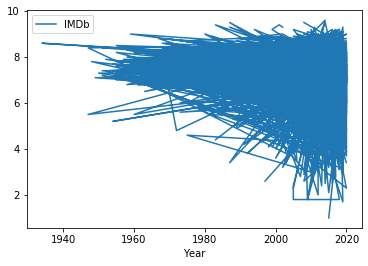

In [156]:
movies.plot(x='Year', y='IMDb')

Let's also try making a histogram:

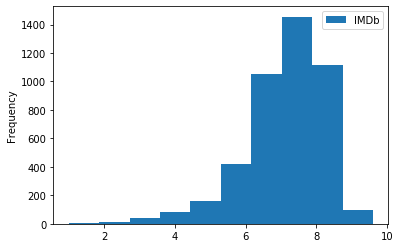

In [157]:
movies.plot(y='IMDb', kind='hist')

So we see that the average rating on IMDb is ~7.5-8 out of 10.

What about trying to do the same thing for Rotten Tomatoes' ratings?

In [158]:
movies.plot(y='Rotten Tomatoes',  kind='hist')

TypeError: no numeric data to plot

Oop!  Looks like the the data type of the Rotten Tomatoes ratings is not numeric:

In [160]:
movies['Rotten Tomatoes'].dtype

dtype('O')

'O' means object and we want a float!

Googling: "from percentage to decimal pandas"

Gets: https://stackoverflow.com/questions/25669588/convert-percent-string-to-float-in-pandas-read-csv

In [161]:
movies['Rotten Tomatoes'].str.rstrip('%').astype('float')/100

0       0.96
1       0.93
2       0.91
3       0.78
4       0.97
        ... 
5606     NaN
5607     NaN
5608     NaN
5609     NaN
5610     NaN
Name: Rotten Tomatoes, Length: 5611, dtype: float64

In [162]:
movies['Rotten Tomatoes Num'] = movies['Rotten Tomatoes'].str.rstrip('%').astype('float')/100

In [163]:
movies.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type,Rotten Tomatoes Num
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1,0.96
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1,0.93
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1,0.91
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1,0.78
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1,0.97


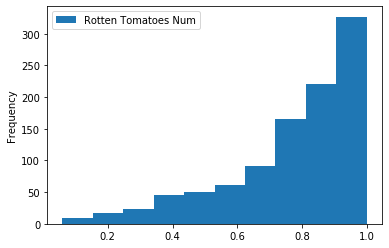

In [164]:
movies.plot(y='Rotten Tomatoes Num',  kind='hist')

TahDah!